<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center"> Linear Regression (Tips)</h3>
    <h4 align="center"><a href="www.linkedin.com/in/sajjad-shurgashti-bb7684326">Sajjad Shurkeshti</a></h5>
</div>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('tips')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.shape

(244, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
236,12.60,1.00,Male,Yes,Sat,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4
215,12.90,1.10,Female,Yes,Sat,Dinner,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [ ]:
df.groupby('day').count()

<ipython-input-11-33b6ae3a738a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').count()


,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [ ]:
df2=df.groupby('day')[['total_bill', 'tip']].sum() # sum per day
df2.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percents
df2

<ipython-input-15-7daefb91e075>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2=df.groupby('day')[['total_bill', 'tip']].sum() # sum per day


KeyError: "['size'] not found in axis"

In [ ]:
df3 = df.groupby('smoker')[['total_bill', 'tip']].sum()
df3['percent'] = df3['tip']/df3['total_bill']*100
df3

<ipython-input-14-9a561141449b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = df.groupby('smoker')[['total_bill', 'tip']].sum()


,total_bill,tip,percent
smoker,,,
Yes,1930.34,279.81,14.495374
No,2897.43,451.77,15.592094


In [ ]:
df4= df.groupby(['day','size'])[['total_bill', 'tip']].sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4.dropna() # drop null rows
df4

<ipython-input-16-029ada7e1cf5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4= df.groupby(['day','size'])[['total_bill', 'tip']].sum()


total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5           0.00    0.00        NaN
     6           0.00    0.00        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6           0.00    0.00        NaN
Sun  1           0.00    0.00        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

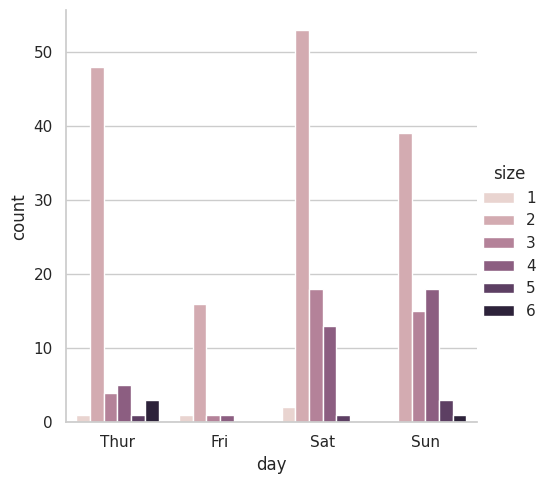

In [ ]:
sns.catplot(x='day' ,hue="size",kind="count", data=df)

## convert sex and smoker columns to values

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
# df = df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} )

df.head()

<ipython-input-4-7988bbff9720>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
<ipython-input-4-7988bbff9720>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
<ipython-input-4-7988bbff9720>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<img src="https://i.imgur.com/mtimFxh.png">

In [ ]:
dftime = pd.get_dummies(df['time']).astype(int)
dftime

,Lunch,Dinner
120,1,0
47,0,1
239,0,1
134,1,0
50,0,1


In [ ]:
dfdays=pd.get_dummies(df['day']).astype(int)
dfdays.sample(5)

,Thur,Fri,Sat,Sun
106,0,0,1,0
143,1,0,0,0
76,0,0,1,0
94,0,1,0,0
137,1,0,0,0


In [ ]:
days=pd.get_dummies(df['day'])
df = pd.concat([df,days],axis=1)

In [ ]:
times=pd.get_dummies(df['time'])
df = pd.concat([df,times],axis=1)

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,0,1,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,0,1,0,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,0,0,1,0,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,0,0,1,0,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,0,0,1,0,0,1


In [ ]:
type(df)

pandas.core.frame.DataFrame

<AxesSubplot:>

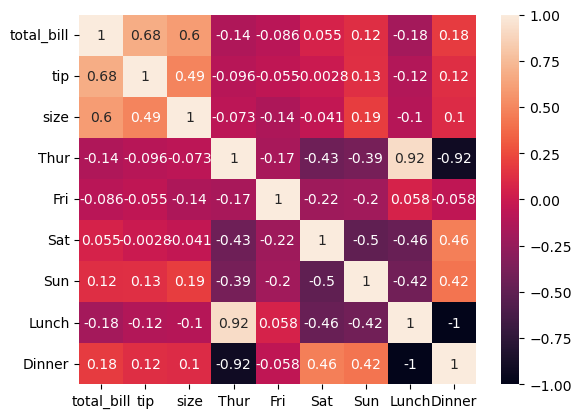

In [ ]:
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True)

In [ ]:
X = df[['total_bill','size']]
Y = df['tip']

In [ ]:
X

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [ ]:
Y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/390px-Scikit_learn_logo_small.svg.png">

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [ ]:
X_train

,total_bill,size
51,10.29,2
41,17.46,2
86,13.03,2
236,12.60,2
220,12.16,2
...,...,...
3,23.68,2
130,19.08,2
134,18.26,2
155,29.85,5


In [ ]:
y_train

51     2.60
41     2.54
86     2.00
236    1.00
220    2.20
       ... 
3      3.31
130    1.50
134    3.25
155    5.14
75     1.25
Name: tip, Length: 183, dtype: float64

In [ ]:
X_test

,total_bill,size
152,17.26,3
31,18.35,4
48,28.55,3
61,13.81,2
239,29.03,3
...,...,...
36,16.31,3
55,19.49,2
1,10.34,3
153,24.55,4


In [ ]:
y_test

152    2.74
31     2.50
48     2.05
61     2.00
239    5.92
       ... 
36     2.00
55     3.51
1      1.66
153    2.00
143    5.00
Name: tip, Length: 61, dtype: float64

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions=regressor.predict(X_test)

In [ ]:
X_test

,total_bill,size
152,17.26,3
31,18.35,4
48,28.55,3
61,13.81,2
239,29.03,3
...,...,...
36,16.31,3
55,19.49,2
1,10.34,3
153,24.55,4


In [ ]:
y_test

152    2.74
31     2.50
48     2.05
61     2.00
239    5.92
       ... 
36     2.00
55     3.51
1      1.66
153    2.00
143    5.00
Name: tip, Length: 61, dtype: float64

In [ ]:
predictions

array([2.83165337, 3.10029679, 3.89783131, 2.34014194, 3.9431604 ,
       5.42291454, 2.48840583, 2.7188287 , 4.58532249, 2.97097175,
       3.55547639, 4.69720281, 3.32793833, 1.76691783, 3.02007827,
       3.09463065, 3.18439621, 3.90583247, 2.92464657, 2.13993846,
       4.86534992, 2.96858499, 4.12214174, 2.2636491 , 2.95208463,
       3.63480229, 1.57899099, 2.99646937, 1.8641865 , 2.76226908,
       2.68955366, 2.49218325, 3.4869847 , 2.31181126, 3.18534057,
       4.65470679, 5.09005491, 2.40719121, 2.57245352, 5.02489435,
       2.38263796, 2.80948688, 2.9076999 , 2.45818644, 2.50257117,
       3.29861155, 1.68053513, 2.24098455, 2.00583991, 1.83963325,
       1.74519765, 2.21454259, 2.89164585, 2.68338948, 2.17721465,
       2.30331205, 2.74193955, 2.87653615, 2.17815901, 3.68579752,
       4.25330374])

<AxesSubplot:xlabel='tip', ylabel='Count'>

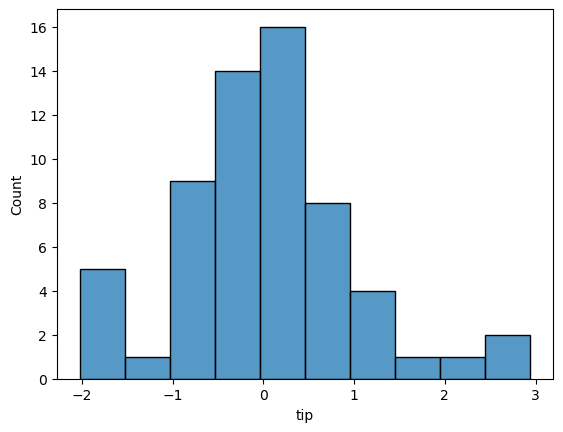

In [ ]:
sns.histplot(y_test-predictions)

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*rVTCIffI2D_-i_CGeHwF6A.png">

### 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

<img src="https://cdn-images-1.medium.com/max/800/1*4kvomfLGxysM67hza_-B9Q.png" width=25% />

###  2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

<img src="https://cdn-images-1.medium.com/max/800/1*T37cOEU9OkXNPuqGQcXHSA.png" width=25% />

###  3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

<img src="https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif" width=25% />

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7025155441759791
Mean Squared Error: 0.9073952153545377
Root Mean Squared Error: 0.9525729448995167


## New Data

In [ ]:
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


## new_customer

In [ ]:
new_customer = np.array([8,1]).reshape(1,-1)
regressor.predict(new_customer)

C:\Users\soso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.62576248])

In [ ]:
regressor.coef_

array([0.0944356 , 0.16570861])

In [ ]:
regressor.intercept_

0.7045690567962533